In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from bluerecording.writeH5 import getSegmentMidpts,sort_electrode_names, getArraySpacing
%matplotlib ipympl

In [2]:
fname = 'csd_paper/electrodes/derivative.h5'

In [3]:
f = h5py.File(fname)

In [4]:
f['S1nonbarrel_neurons'].keys()

<KeysViewHDF5 ['node_ids', 'offsets']>

In [5]:
f['electrodes']['S1nonbarrel_neurons']['scaling_factors']

<HDF5 dataset "scaling_factors": shape (78575193, 99), type "<f8">

In [6]:
for dirpath, dirnames, filenames in os.walk('csd_paper/electrodes/positions'):
        for filename in filenames[:1]:
            file_path = os.path.join(dirpath, filename)
            positions = pd.read_pickle(file_path)

In [7]:
pos = pd.read_pickle(file_path)

In [8]:
node_ids = np.unique(np.array(list(pos.columns))[:,0])

In [9]:
import time 

In [10]:
t = time.time()
newPos = getSegmentMidpts(pos[node_ids[0:2]],node_ids[0:2])
print(time.time()-t)

/home/tharayil/BlueRecording/bluerecording/writeH5.py:442: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  newPos = positions.groupby(level=0,axis=1,group_keys=False).apply(getNeuronSegmentMidpts)


0.3520650863647461


In [11]:
originalFile = h5py.File('csd_paper/electrodes/coeffs_highRes.h5')
electrodeNames = sort_electrode_names(originalFile['electrodes'].keys(),'S1nonbarrel_neurons')
allEpos = []
for e in electrodeNames:
    allEpos.append( originalFile['electrodes'][str(e)]['position'][:] )
allEpos = np.array(allEpos)
originalFile.close()

In [12]:
allEpos = allEpos[1:-1]

In [13]:
main_axis, arraySpacing = getArraySpacing(allEpos)

In [14]:
def distances_in_planar_coords(compartment_positions, electrodePos, main_axis):

    '''
    For a disk or plane perpendicular to main_axis, returns the axial and radial coordinates of each of the compartment positions
    '''

    from bluerecording.writeH5 import calculate_axial_vectors

    ### Projects compartment positions onto plane, containing the point electrodePos, normal to electrode array
    differenceVectors = compartment_positions.values - electrodePos[:,np.newaxis]

    axialDistances = np.matmul(differenceVectors.T,main_axis) # Size len(compartment_positions)x1

    #axialVectors = calculate_axial_vectors(axialDistances,main_axis) # Projection of diffence vector onto the main axis of the electrode array


    return axialDistances

In [15]:
distances_in_planar_coords(newPos[node_ids[0]],allEpos[1],main_axis).shape

(483, 1)

In [16]:
import bluepysnap as bp

In [17]:
c = bp.Simulation('csd_paper/electrodes/simulation_config.json')

In [18]:
hex0 = next(c.circuit.nodes.get('hex0',properties=['mtype']))

In [19]:
hex0Ids = np.array(hex0[1].loc['S1nonbarrel_neurons'].index)

In [20]:
np.save('hex0Ids.npy',hex0Ids)

In [21]:
newNodeIds

NameError: name 'newNodeIds' is not defined

In [ ]:
node_ids = np.unique(np.array(list(positions.columns))[:,0])

In [86]:
offset1-offset

995

In [94]:
positions[ids]

section,0,1,1,1,1,1,1,2,2,2,...,377,377,377,377,378,378,378,378,378,378
0,4029.511821,4029.511821,4025.210296,4020.908772,4016.607247,4012.983490,4009.765213,4009.912634,4006.112900,4002.223165,...,4136.353394,4147.254630,4162.782223,4176.861349,3989.848326,3898.081708,3793.173189,3727.889435,3754.824463,3820.289508
1,-1321.616312,-1321.616312,-1321.381844,-1321.147376,-1320.912908,-1320.137705,-1319.039002,-1318.947517,-1317.960880,-1317.029517,...,-1446.194468,-1459.489679,-1475.991595,-1497.469564,-1314.715825,-1354.587528,-1487.860702,-1529.343128,-1608.663782,-1726.117850
2,-2472.177322,-2472.177322,-2476.353674,-2480.530025,-2484.706376,-2489.362550,-2494.305783,-2494.406094,-2498.943557,-2503.414453,...,-2380.453913,-2360.842688,-2348.420908,-2344.993213,-2516.277338,-2541.482575,-2442.797972,-2261.225527,-2088.788857,-1947.786938


In [103]:
newPos[183731]

section,0,1,1,1,1,1,2,2,2,2,...,379,379,379,379,379,380,380,380,380,380
0,4005.005005,4002.531374,3997.584114,3992.614661,3987.717157,3983.229592,3979.378512,3976.406795,3973.719022,3970.552024,...,4733.849172,4747.761278,4761.769363,4773.689726,4776.837591,3934.001066,3978.735257,4114.385836,4239.010081,4360.635625
1,-1345.904027,-1346.445616,-1347.528796,-1347.545700,-1345.532014,-1342.278114,-1338.689126,-1335.363734,-1333.638167,-1333.511212,...,-1489.454317,-1507.997327,-1526.526283,-1545.696629,-1567.411362,-1310.263597,-1291.229965,-1313.304139,-1344.291766,-1351.940925
2,-2675.690887,-2677.299561,-2680.516910,-2683.413450,-2685.697209,-2687.922606,-2690.742960,-2694.668497,-2699.491223,-2704.525856,...,-2024.301421,-2021.219471,-2018.664526,-2014.357917,-2011.407448,-2755.470651,-2742.106606,-2609.455083,-2462.010620,-2313.238495


In [100]:
getSegmentMidpts(positions[[ids]],[ids])

/home/tharayil/BlueRecording/bluerecording/writeH5.py:442: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  newPos = positions.groupby(level=0,axis=1,group_keys=False).apply(getNeuronSegmentMidpts)


id            183767                                                      \
section          0            1            1            1            1     
0        4029.511821  4027.361059  4023.059534  4018.758009  4014.795368   
1       -1321.616312 -1321.499078 -1321.264610 -1321.030142 -1320.525306   
2       -2472.177322 -2474.265498 -2478.441849 -2482.618201 -2487.034463   

id                                                                        ...  \
section          1            2            2            2            2    ...   
0        4011.374351  4008.012767  4004.168032  4000.194749  3996.093615  ...   
1       -1319.588354 -1318.454198 -1317.495199 -1316.625509 -1315.858665  ...   
2       -2491.834166 -2496.674825 -2501.179005 -2505.587229 -2509.898239  ...   

id                                                                        \
section          376          376          377          377          377   
0        4120.606347  4112.537075  4141.804012  4155.018426  4169.821786   
1       -1498.115335 -1508.195824 -1452.842073 -1467.740637 -1486.730579   
2       -2373.261202 -2361.953489 -2370.648300 -2354.631798 -2346.707061   

id                                                                        
section          378          378          378          378          378  
0        3943.965017  3845.627449  3760.531312  3741.356949  3787.556986  
1       -1334.651676 -1421.224115 -1508.601915 -1569.003455 -1667.390816  
2       -2528.879957 -2492.140274 -2352.011749 -2175.007192 -2018.287897  

[3 rows x 995 columns]

In [ ]:


electrodeIndices = [10,25,50,75,90]
allDistances = []
allCsdCoeffs = []
np.random.seed(2643)

end = False

for electrodeIdx in electrodeIndices:
    csdCoeffs = []
    distances = []

    numFiles = 0
    numNeurons = 0

    for dirpath, dirnames, filenames in os.walk('csd_paper/electrodes/positions'):
            for filename in filenames:
                
                file_path = os.path.join(dirpath, filename)
                positions = pd.read_pickle(file_path)
                
                node_ids = np.unique(np.array(list(positions.columns))[:,0])

                node_ids = node_ids[np.isin(node_ids,hex0Ids)]

                newNodeIds = np.random.choice(node_ids,int(0.05*len(node_ids)),replace=False)

                newPos = getSegmentMidpts(positions[newNodeIds],newNodeIds)
    
                for ids in newNodeIds:
    
                    nodeIndex = np.where(f['S1nonbarrel_neurons']['node_ids']==ids)[0][0]
    
                    offset = f['S1nonbarrel_neurons']['offsets'][nodeIndex]
                    offset1 = f['S1nonbarrel_neurons']['offsets'][nodeIndex+1]

                    if len(distances_in_planar_coords(newPos[ids],allEpos[electrodeIdx],main_axis)) != len(f['electrodes']['S1nonbarrel_neurons']['scaling_factors'][offset:offset1,electrodeIdx]):
                        end = True

                    if end:
                        break
                    
                    distances.append(distances_in_planar_coords(newPos[ids],allEpos[electrodeIdx],main_axis))
                    
                    csdCoeffs.append(f['electrodes']['S1nonbarrel_neurons']['scaling_factors'][offset:offset1,electrodeIdx])   
                if end:
                    print('break')
                    break
            if end:
                break

                    #numNeurons += 1

    if end:
        break

    print(electrodeIdx)

    allCsdCoeffs.append(csdCoeffs)
    allDistances.append(distances)
    
            

/home/tharayil/BlueRecording/bluerecording/writeH5.py:442: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  newPos = positions.groupby(level=0,axis=1,group_keys=False).apply(getNeuronSegmentMidpts)
/home/tharayil/BlueRecording/bluerecording/writeH5.py:442: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  newPos = positions.groupby(level=0,axis=1,group_keys=False).apply(getNeuronSegmentMidpts)
/home/tharayil/BlueRecording/bluerecording/writeH5.py:442: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  newPos = positions.groupby(level=0,axis=1,group_keys=False).apply(getNeuronSegmentMidpts)
/home/tharayil/BlueRecording/bluerecording/writeH5.py:442: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  newPos = positions.groupby(level=0,axis=1,group_keys=F

In [27]:
len(newNodeIds)

NameError: name 'newNodeIds' is not defined

In [83]:
len(csdCoeffs)

212

In [84]:
len(distances[0])

101

In [85]:
len(csdCoeffs[0])

101

In [72]:
distances = allDistances[0]
csdCoeffs = allCsdCoeffs[0]

In [56]:
distances = np.array(distances)
csdCoeffs = np.array(csdCoeffs)

In [57]:
newDistances = distances[0]
for d in distances[1:]:
    newDistances = np.vstack((newDistances,d))

In [58]:
newcoeffs = csdCoeffs[0][:,np.newaxis]
for c in csdCoeffs[1:]:
    newcoeffs = np.vstack((newcoeffs,c[:,np.newaxis]))

In [63]:
newDistances.shape

(545757, 1)

In [69]:
distances[0].shape

(266, 1)

In [75]:
for i in range(len(csdCoeffs)):

    if csdCoeffs[i].shape[0]!=distances[i].shape[0]:
        print(i)
        print(csdCoeffs[i].shape)
        print(distances[i].shape)
        break


64
(995,)
(2222, 1)


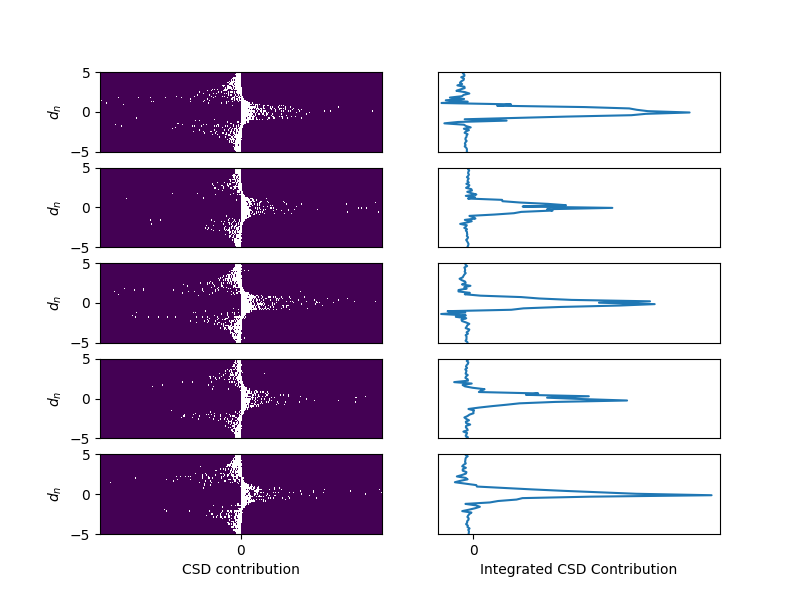

In [22]:

fig, axes = plt.subplots(5,2,figsize=(8,6))

for i in range(5):
    
    distances = allDistances[4-i]
    csdCoeffs = allCsdCoeffs[4-i]
    
    distances = np.array(distances)
    csdCoeffs = np.array(csdCoeffs)

    newDistances = distances[0]
    for d in distances[1:]:
        newDistances = np.vstack((newDistances,d))
    
    newcoeffs = csdCoeffs[0][:,np.newaxis]
    for c in csdCoeffs[1:]:
        newcoeffs = np.vstack((newcoeffs,c[:,np.newaxis]))


    axes[i][0].hist2d(newcoeffs[:,0],newDistances[:,0]/20,bins=[10000,1000],cmin=0,cmax=0.5)
    if i == 4:
        axes[i][0].set_xlabel('CSD contribution')
        axes[i][0].set_xticks([0])
    else:
        axes[i][0].set_xticks([])
        
    axes[i][0].set_xlim([-5e-6,5e-6])

    axes[i][0].set_ylabel('$d_n$')
    axes[i][0].set_ylim([-5,5])


    hist, xbins, ybins = np.histogram2d(newcoeffs[:,0],newDistances[:,0]/20,bins=[10000,1000])
    xvals = (xbins[1:]+xbins[:-1])/2
    yvals = (ybins[1:]+ybins[:-1])/2

    axes[i][1].plot(np.sum(hist*xvals[:,np.newaxis],axis=0),yvals)
    axes[i][1].set_ylim([-5,5])

    if i == 4:
        axes[i][1].set_xlabel('Integrated CSD Contribution')
        axes[i][1].set_xticks([0])
    else:
        axes[i][1].set_xticks([])
        
    axes[i][1].set_yticks([])
    axes[i][1].set_xlim([-5e-5,35e-5])

plt.savefig('histograms.png')

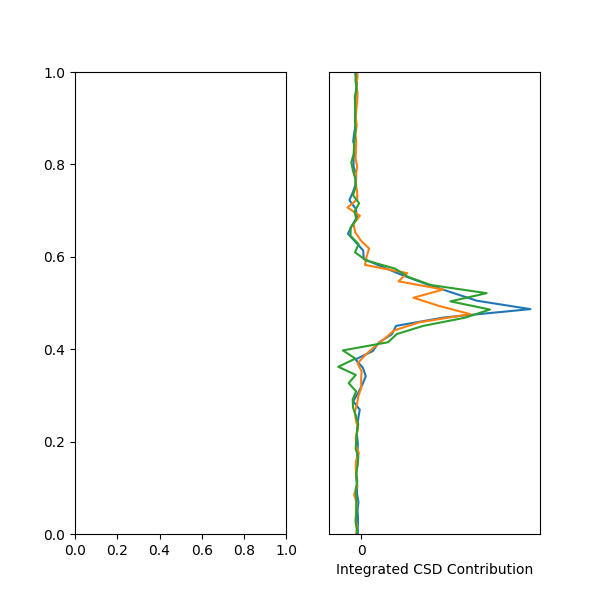

In [19]:
plt.figure(figsize=(6,6))

for i in range(3):
    
    distances = allDistances[i]
    csdCoeffs = allCsdCoeffs[i]
    
    distances = np.array(distances)
    csdCoeffs = np.array(csdCoeffs)

    newDistances = distances[0]
    for d in distances[1:]:
        newDistances = np.vstack((newDistances,d))
    
    newcoeffs = csdCoeffs[0][:,np.newaxis]
    for c in csdCoeffs[1:]:
        newcoeffs = np.vstack((newcoeffs,c[:,np.newaxis]))

    plotIdx = [1,2]

    plt.subplot(1,2,plotIdx[0])

    # plt.hist2d(newcoeffs[:,0],newDistances[:,0]/20,bins=[10000,1000],cmin=0,cmax=0.5)
    # if i == 2:
    #     plt.xlabel('CSD contribution')
    # plt.xticks([0])
    # plt.xlim([-2e-6,2e-6])

    # plt.ylabel('$d_n$')
    # plt.ylim([-5,5])

    plt.subplot(1,2,plotIdx[1])

    hist, xbins, ybins = np.histogram2d(newcoeffs[:,0],newDistances[:,0]/20,bins=[10000,1000])
    xvals = (xbins[1:]+xbins[:-1])/2
    yvals = (ybins[1:]+ybins[:-1])/2

    plt.plot(np.sum(hist*xvals[:,np.newaxis],axis=0),yvals)
    plt.ylim([-5,5])

    if i == 2:
        plt.xlabel('Integrated CSD Contribution')
    plt.xticks([0])
    plt.yticks([])

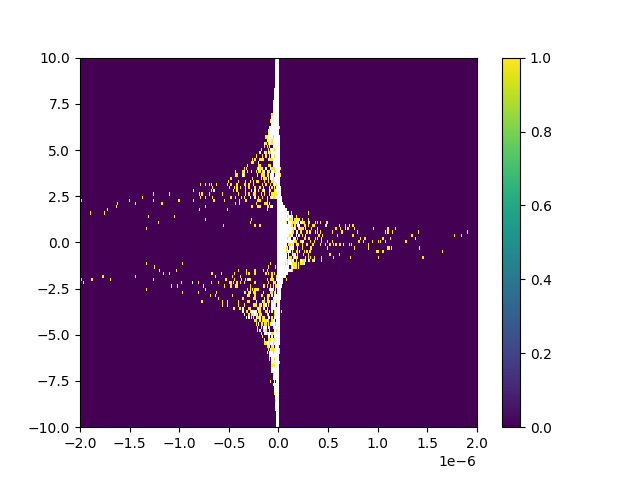

In [32]:
plt.figure()
plt.hist2d(newcoeffs[:,0],newDistances[:,0]/20,bins=[10000,1000],cmin=0,cmax=1)
plt.xlim([-2e-6,2e-6])
plt.ylim([-10,10])
plt.colorbar()

In [33]:
hist, xbins, ybins = np.histogram2d(newcoeffs[:,0],newDistances[:,0]/20,bins=[10000,1000])

In [39]:
len(newcoeffs)/f['electrodes']['S1nonbarrel_neurons']['scaling_factors'].shape[0]/7

0.0010169530950345322

In [43]:
1493/30000

0.04976666666666667

In [35]:
xvals = (xbins[1:]+xbins[:-1])/2

In [36]:
yvals = (ybins[1:]+ybins[:-1])/2

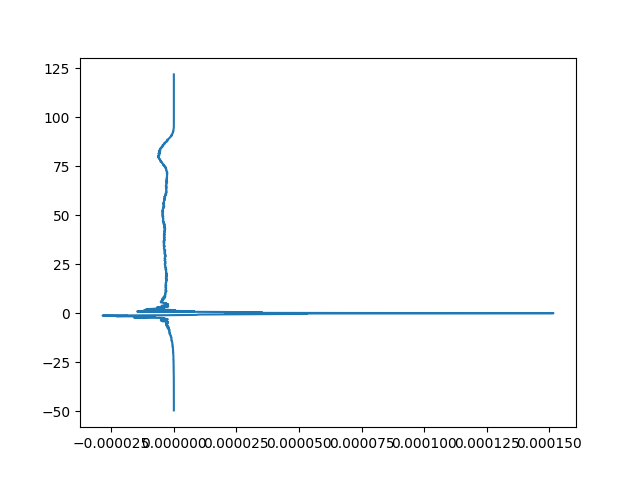

In [37]:
plt.figure()
plt.plot(np.sum(hist*xvals[:,np.newaxis],axis=0),yvals)

In [ ]:
np.save('allCoeffs.npy',allCsdCoeffs)
np.save('allDistances.npy',allDistances)

In [20]:
allCsdCoeffs = np.load('allCoeffs.npy',allow_pickle=True)
allDistances = np.load('allDistances.npy',allow_pickle=True)

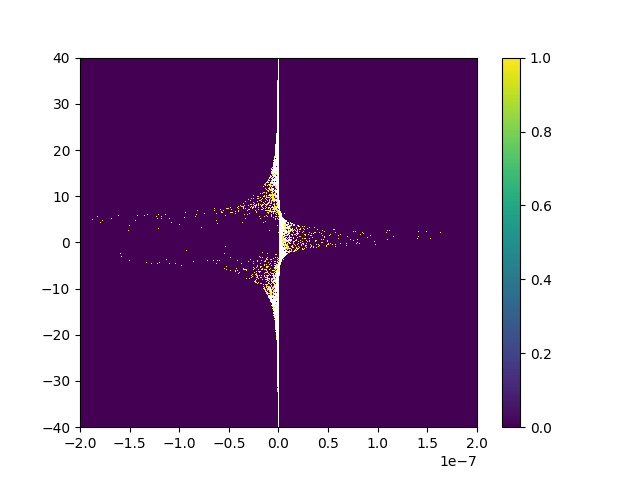

In [45]:
plt.figure()
plt.hist2d(newcoeffs[:,0],newDistances[:,0]/20,bins=[10000,1000],cmin=0,cmax=1)
plt.xlim([-2e-7,2e-7])
plt.ylim([-40,40])
plt.colorbar()

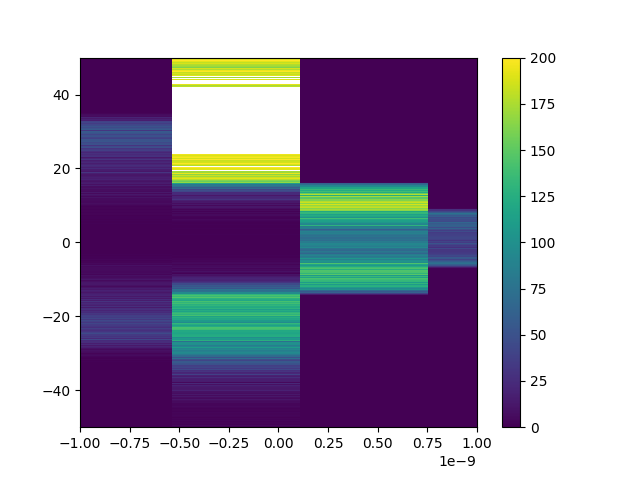

In [28]:
plt.figure()
plt.hist2d(newcoeffs[:,0],newDistances[:,0]/20,bins=[10000,1000],cmin=0,cmax=200)
plt.xlim([-1e-9,1e-9])
plt.ylim([-50,50])
plt.colorbar()

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

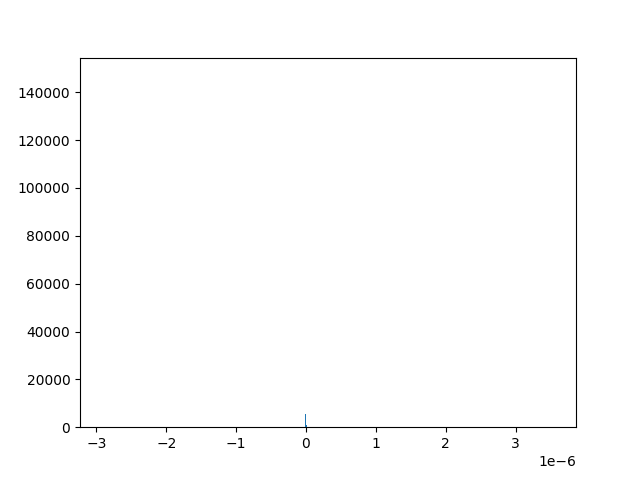

In [25]:
plt.figure()
plt.hist(newcoeffs,bins=1000)

In [26]:
newDistances.shape

(155191, 1)

In [27]:
f.close()